Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Exploratory data analysis
4. Data Cleaning
5. Data Pre-Processing
6. Model Training
7. Choose best model

## Problem statement

This contains measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months). we need to find out total energy consumed but considering three columns which have 
1. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
2. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
3. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

##  Data Collection.
1. The Dataset is collected from https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption
2. The data consists of 9 column and 2075259 rows.

## Data

1. date: Date in format dd/mm/yyyy 
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
df = pd.read_table(r'household_power_consumption.txt', delimiter=';', parse_dates = {'Date_Time':['Date', 'Time']}, infer_datetime_format =True, low_memory = False, na_values = ['nan', '?'], index_col = 'Date_Time')

1. Note that data include 'nan' and '?' as a string. I converted both to numpy nan in importing stage and treated both of them the same.
2. I merged two columns 'Date' and 'Time' to "Date_Time".
3. I aslo converted 'Date_Time' to datetime- series type, by taking index to be the Date_Time.

In [3]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Dealing with missing values 'nan' with a test statistic

In [3]:
# finding all columns that have nan :
# df.iloc[:,i] --> represent column


droping_list = []
for i in range(0,7):
    if not df.iloc[:,i].notnull().all():
        droping_list.append(i)
    #print(df.iloc[:,i].unique())
droping_list                       # means we have nan values in all the seven columns

[0, 1, 2, 3, 4, 5, 6]

In [11]:
 df.iloc[:,1].notnull().all()

False

In [4]:
# Filling nan with mean in any columns

for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [16]:
# making sure

df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Data visualization

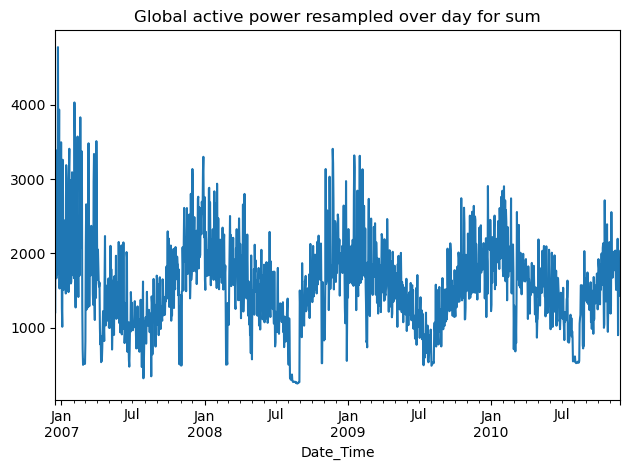

In [17]:
### I resample over day, and show the sum and mean of Global_active power.
## It is seen that mean and sum of resampled data set, have similar structure.

df['Global_active_power'].resample('D').sum().plot(title = 'Global active power resampled over day for sum')
plt.tight_layout()
plt.show()


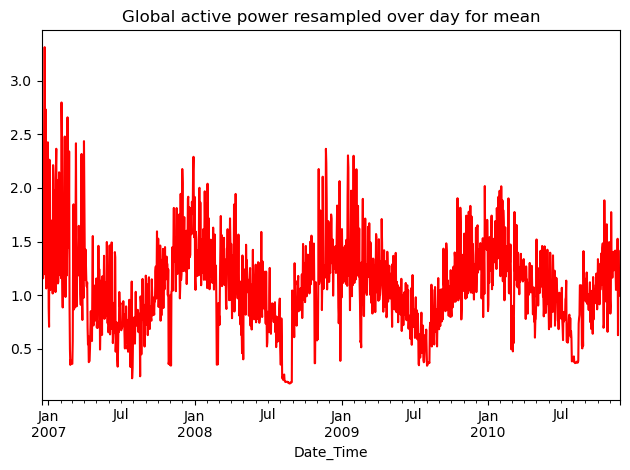

In [19]:
df['Global_active_power'].resample('D').mean().plot(title = 'Global active power resampled over day for mean', color = 'red')
plt.tight_layout()
plt.show()

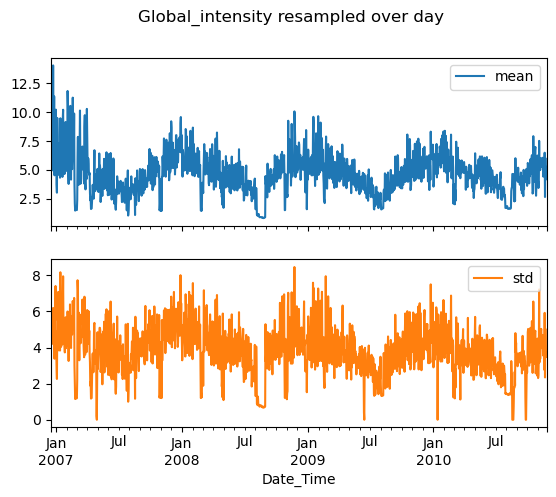

In [18]:
# mean and std of 'Global_intensity' resampled over day

r  = df['Global_intensity'].resample('D').agg(['mean','std'])
r.plot(subplots = True, title = 'Global_intensity resampled over day')
plt.show()

In [19]:
df['Global_intensity'].resample('D').agg(['mean','std'])

,mean,std
Date_Time,,
2006-12-16,13.082828,4.283262
2006-12-17,9.999028,5.031445
2006-12-18,6.421667,4.248511
2006-12-19,4.926389,5.238010
2006-12-20,6.467361,5.556587
...,...,...
2010-11-22,6.014167,5.040767
2010-11-23,4.674444,3.744162
2010-11-24,5.249583,3.741719


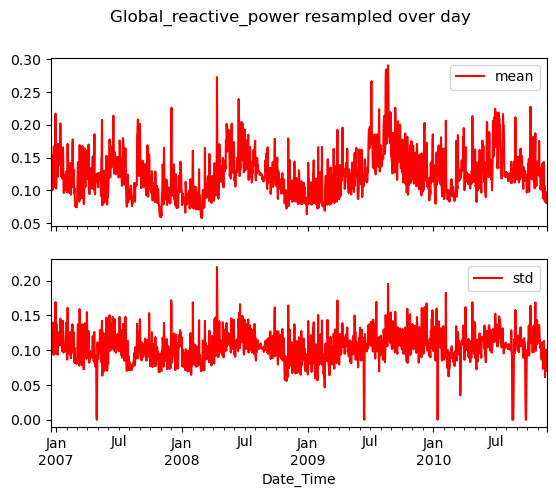

In [20]:
## mean and std of 'Global_reactive_power' resampled over day

r2 = df.Global_reactive_power.resample('D').agg(['mean','std'])
r2.plot(subplots = True, title = 'Global_reactive_power resampled over day', color = 'red')
plt.show()

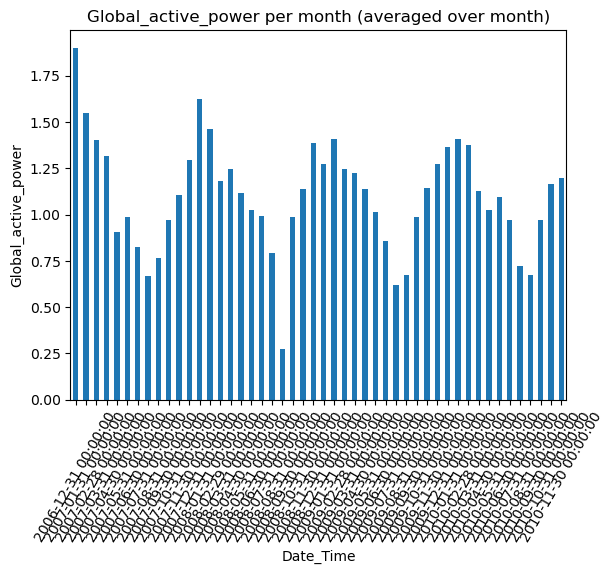

In [21]:
# sum of 'Global active power' resampled over month

df['Global_active_power'].resample('M').mean().plot(kind = 'bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

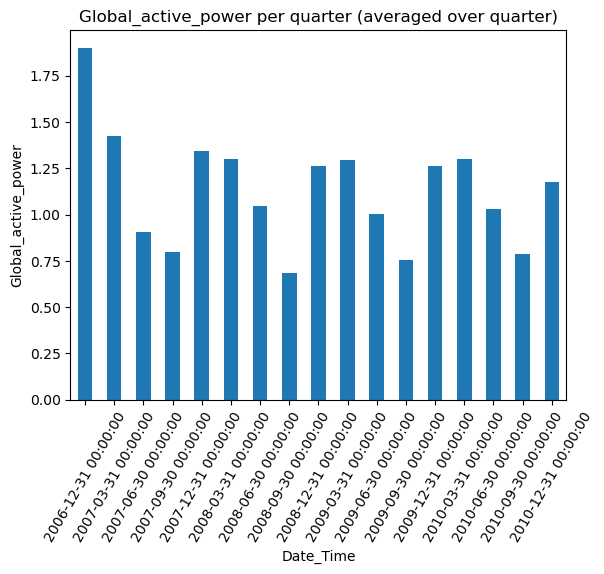

In [22]:
# Mean of Global_active_power resampled over quarter

df['Global_active_power'].resample('Q').mean().plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

1.  it is important to note from above two plots that resampling over larger time interval, will diminish the periodcity of system as we expect. This is important for machine learning feature engineering.

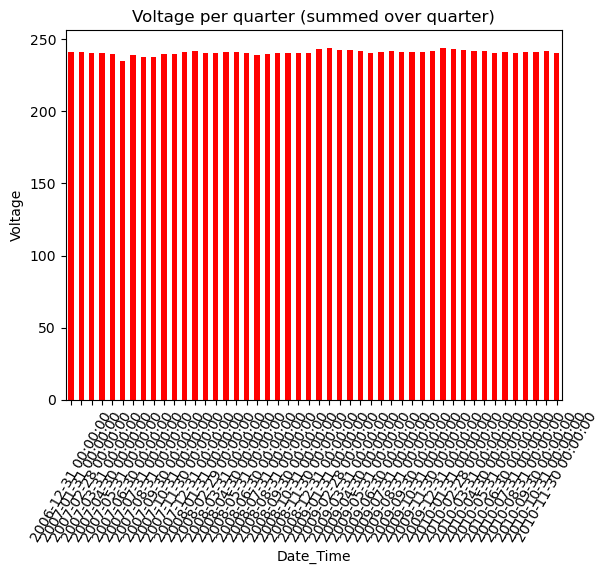

In [23]:
# mean of 'voltage' resampled over month

df['Voltage'].resample('M').mean().plot(kind = 'bar', color = 'red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

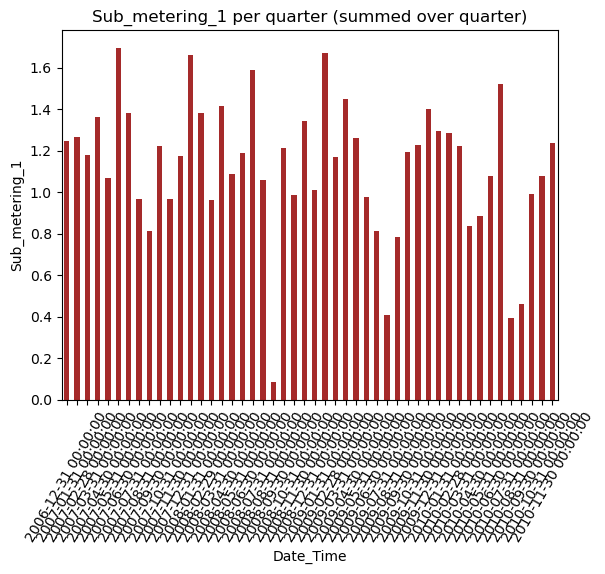

In [24]:
df['Sub_metering_1'].resample('M').mean().plot(kind = 'bar', color ='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()


1.  It is seen from the above plots that the mean of voltage over month is pretty much constant compared to other features. This is important again in feature selection.

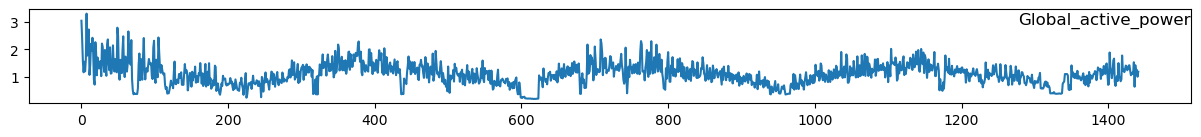

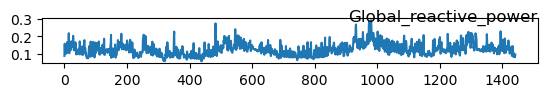

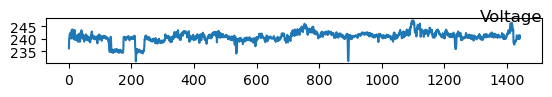

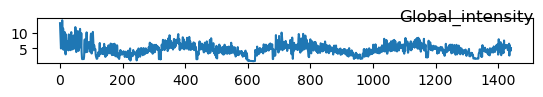

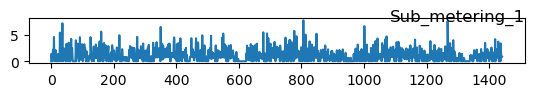

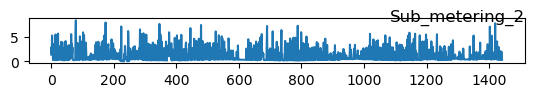

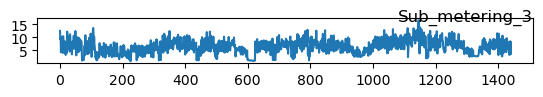

In [25]:
#  Compare the mean of different features resampled over day.
# Specify columns to plot

cols = [0, 1, 2, 3, 4, 5, 6]
i = 1
groups = cols
values = df.resample('D').mean().values

# plot each column
plt.figure(figsize = (15,10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc = 'right')
    i = i+1
    plt.show()

<Axes: xlabel='Date_Time'>

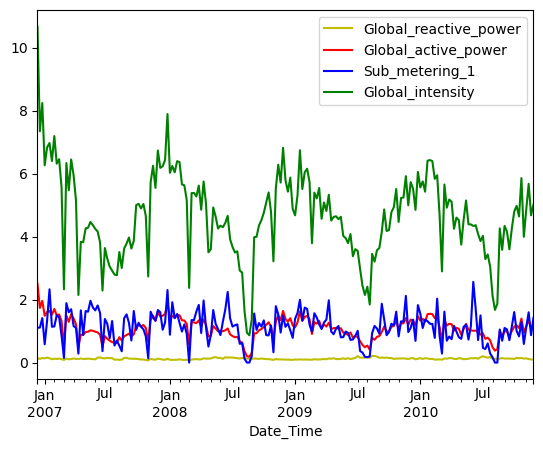

In [26]:
# resampling over week and computing mean

df['Global_reactive_power'].resample('W').mean().plot(color = 'y', legend = True)
df['Global_active_power'].resample('W').mean().plot(color = 'r', legend = True)
df['Sub_metering_1'].resample('W').mean().plot(color = 'b', legend = True)
df['Global_intensity'].resample('W').mean().plot(color = 'g', legend = True)

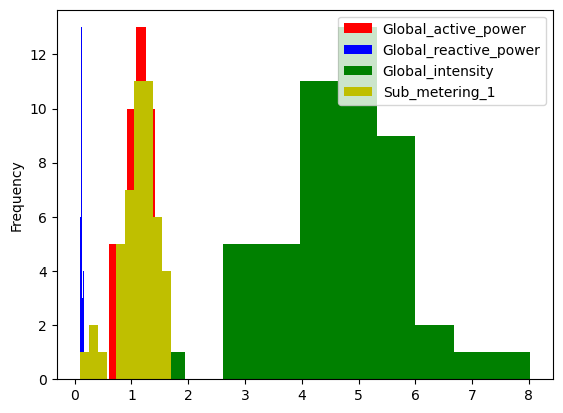

In [27]:
# hist plot of the mean of different feature resampled over month

df['Global_active_power'].resample('M').mean().plot(kind = 'hist', color = 'r', legend =True)
df['Global_reactive_power'].resample('M').mean().plot(kind = 'hist', color = 'b', legend = True)
df['Global_intensity'].resample('M').mean().plot(kind='hist', color = 'g', legend = True)
df['Sub_metering_1'].resample('M').mean().plot(kind = 'hist', color = 'y', legend = True)
plt.show()

### Multicollinearity in Numerical features


In [28]:
df[list(df.columns)[0:]].corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


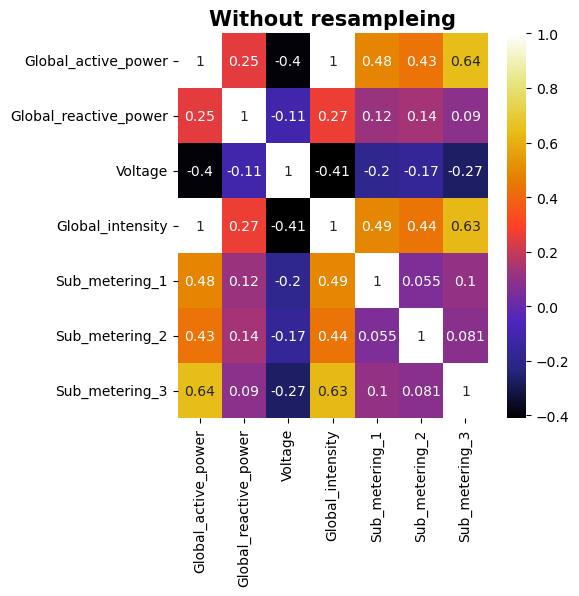

In [29]:
plt.figure(figsize = (5,5))
plt.title('Without resampleing', size = 15, weight='bold')
sns.heatmap(df.corr(), cmap = 'CMRmap', annot = True )
plt.show()

##### Report

1.  Global_active_power, Global_intensity are having negative correlation with voltage
2. voltage is having negative correlation with others feature
3. Global_active_power is having strong positive correlationship with Global_intensity

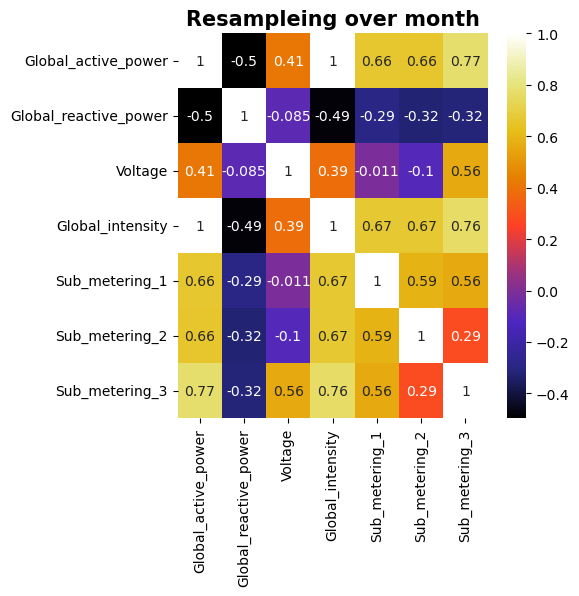

In [30]:
plt.figure(figsize = (5,5))
plt.title('Resampleing over month', size = 15, weight='bold')
sns.heatmap(df.resample('M').mean().corr(), cmap = 'CMRmap', annot = True )
plt.show()

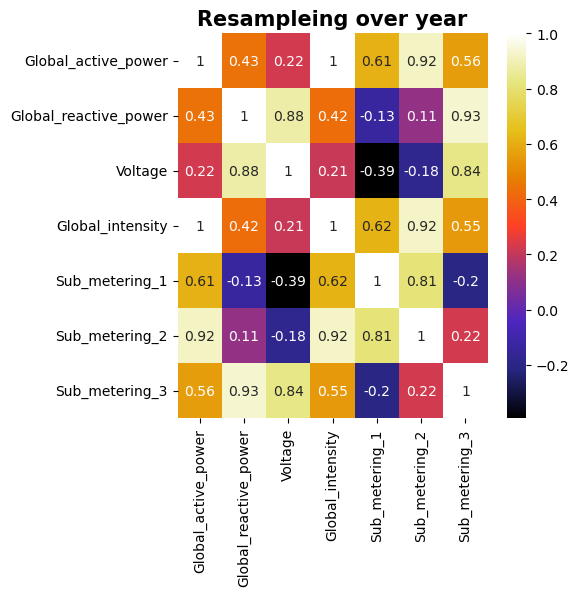

In [31]:
plt.figure(figsize = (5,5))
plt.title('Resampleing over year', size = 15, weight='bold')
sns.heatmap(df.resample('A').mean().corr(), cmap = 'CMRmap', annot = True )
plt.show()

1.  it is seen from above that with re sampling technique one can change the correlations among features. This is important for feature engineering

In [5]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [33]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### Spliting our mathematical feature columns and assigning it to 'X'

In [6]:
X = df.drop(columns = ['Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'])

In [7]:
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Date_Time,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4
2006-12-16 17:25:00,5.360,0.436,233.63,23.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8


In [9]:
df['Metering'] = df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [37]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Metering
Date_Time,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


### Splitting our target variable 'Metering' and assigning to 'Y'

In [10]:
Y = df['Metering']

### splitting up our data set into 'Train' and 'Test'

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

### Scaling the training data (fitting the parameters and transforming the values) 

In [17]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train, y_train)

# transforming the test data. we avoid fitting the values to prevent data leakage
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[-0.69676606, -0.62232274, -0.23867641, -0.73119214],
       [ 1.70771828,  1.00243224, -0.47475266,  1.66710278],
       [-0.26304578,  1.43093905,  0.38568315, -0.23343282],
       ...,
       [ 0.07365812, -1.1043929 , -0.08957562,  0.03807226],
       [-0.86797143, -0.40806934, -2.10554256, -0.86694469],
       [-0.85085089, -0.12239813, -2.34161881, -0.82169384]])

In [19]:
x_test

array([[-0.67203639, -0.30094264,  0.93859859, -0.6859413 ],
       [ 0.41797114,  0.03829192, -0.303908  ,  0.40007905],
       [ 1.42618055,  4.16266995,  0.38568315,  1.48609939],
       ...,
       [-0.76905277, -0.10454368,  0.54720901, -0.77644299],
       [-0.7557368 ,  0.84174218, -0.11753201, -0.73119214],
       [ 1.1902976 , -0.19381594,  0.91064219,  1.12409261]])

### Model Training

In [20]:
regression = LinearRegression()   # when we do this it takes all the default values into it

In [21]:
regression  # LinearRegression() is a object

LinearRegression()

In [22]:
regression.fit(x_train, y_train)

LinearRegression()

In [23]:
# print the coefficient and the intercept

print(regression.coef_)

[ 22.1929549   -0.16020872  -0.26335105 -11.4356463 ]


In [24]:
print(regression.intercept_)

8.890079687729472


In [25]:
# prediction for the test data

reg_pred = regression.predict(x_test)

In [26]:
reg_pred

array([ 1.62082111, 13.66483172, 22.77826733, ...,  0.57429443,
        0.37579953, 22.24280754])

### Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

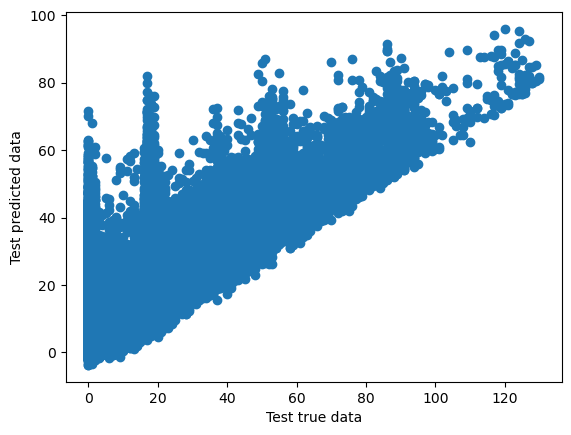

In [27]:
plt.scatter(y_test, reg_pred)  # we are checking relationship b/w true value and predicted value. if we get linear relationship then our model is working good
plt.xlabel('Test true data')
plt.ylabel('Test predicted data')

In [28]:
# residuals
residuals = y_test - reg_pred

In [29]:
residuals

Date_Time
2009-05-09 02:00:00    -0.620821
2009-05-02 10:16:00     4.335168
2010-01-10 11:43:00    -3.778267
2008-04-17 17:31:00    -0.057810
2007-05-14 21:29:00    10.215010
                         ...    
2006-12-26 07:26:00   -25.259183
2009-09-27 04:43:00     2.016507
2008-06-06 00:05:00    -0.574294
2007-06-16 00:50:00     0.624200
2008-12-10 16:16:00    -4.242808
Name: Metering, Length: 622578, dtype: float64

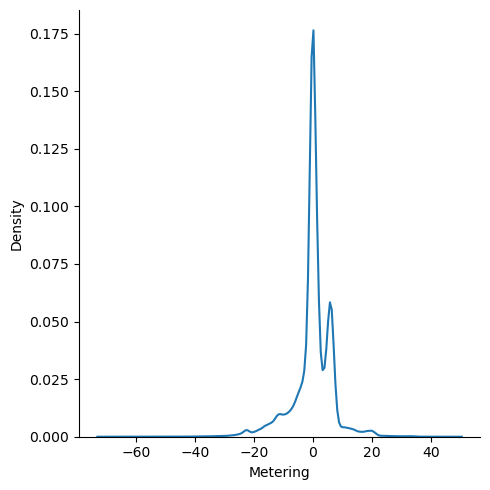

In [30]:
sns.displot(residuals, kind = 'kde') # if we get normally distributed curve, our model is good,


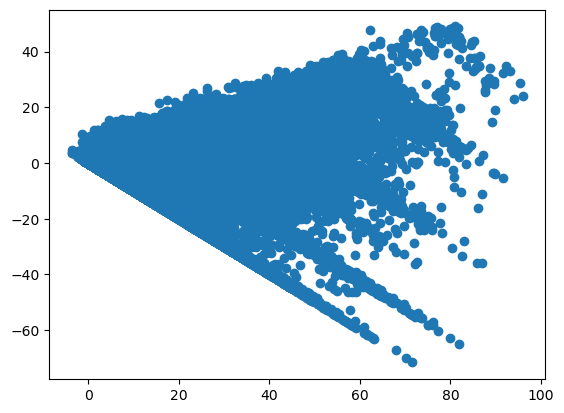

In [31]:
### sctter plot with prediction and residual
# uniformally distribution

plt.scatter(reg_pred, residuals) # no shape, no linearity, model is good

In [32]:
# performance metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

45.767965132524225
4.220749477723685
6.765202519697708


### R square and Adjusted R square

In [33]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.7194079135238778


In [34]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7194061107339305

## Ridge

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [36]:
ridge.fit(x_train, y_train)


Ridge()

In [37]:
ridge.coef_

array([ 22.17926829,  -0.16048621,  -0.26316443, -11.42181627])

In [38]:
ridge.intercept_

8.890079687729472

In [39]:
pred_rid = ridge.predict(x_test)

In [40]:
pred_rid

array([ 1.62079109, 13.66457688, 22.77821746, ...,  0.57421305,
        0.37577509, 22.24228636])

### Assumption of linear regression

Text(0, 0.5, 'Predicted Ridge')

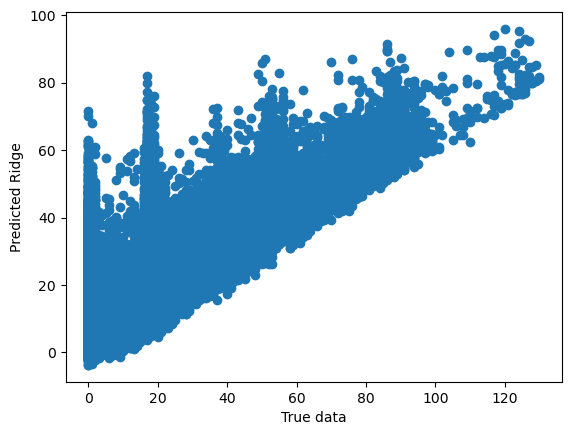

In [41]:
plt.scatter(y_test, pred_rid)
plt.xlabel('True data')
plt.ylabel("Predicted Ridge")

In [43]:
residuals_rid = y_test - pred_rid

In [44]:
residuals_rid

Date_Time
2009-05-09 02:00:00    -0.620791
2009-05-02 10:16:00     4.335423
2010-01-10 11:43:00    -3.778217
2008-04-17 17:31:00    -0.058740
2007-05-14 21:29:00    10.213600
                         ...    
2006-12-26 07:26:00   -25.258955
2009-09-27 04:43:00     2.016142
2008-06-06 00:05:00    -0.574213
2007-06-16 00:50:00     0.624225
2008-12-10 16:16:00    -4.242286
Name: Metering, Length: 622578, dtype: float64

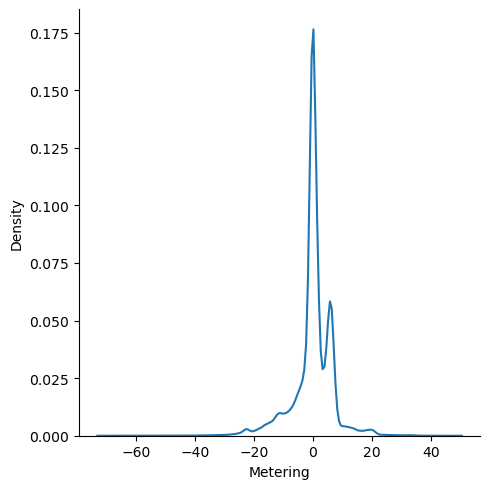

In [46]:
sns.displot(residuals_rid, kind = 'kde')

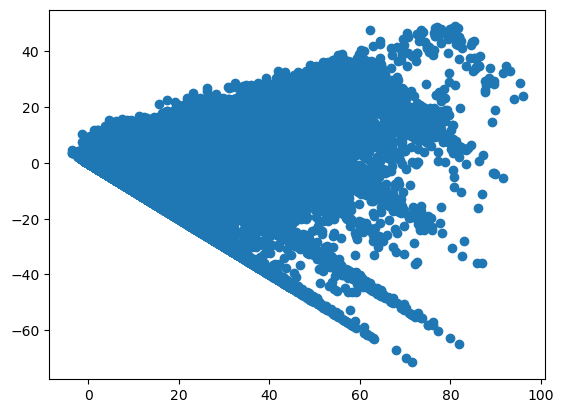

In [47]:
plt.scatter(pred_rid, residuals_rid)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, pred_rid))
print(mean_absolute_error(y_test, pred_rid))
print(np.sqrt(mean_squared_error(y_test, pred_rid)))

45.76797549850179
4.2207611296265295
6.76520328582237


#### R2 and Adjusted R2

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_rid)
print(score)

0.7194078499726304


In [50]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7194060471822747

### Lasso

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [52]:
lasso.fit(x_train, y_train)

Lasso()

In [53]:
lasso.coef_

array([ 9.83594469, -0.        , -0.        ,  0.        ])

In [54]:
lasso.intercept_

8.890079687729472

In [55]:
pred_las = lasso.predict(x_test)

In [56]:
pred_las

array([ 2.2799669 , 13.00122072, 22.91791273, ...,  1.32571918,
        1.45669436, 20.59778102])

#### Assumptions of linear regression

Text(0, 0.5, 'Predicted value')

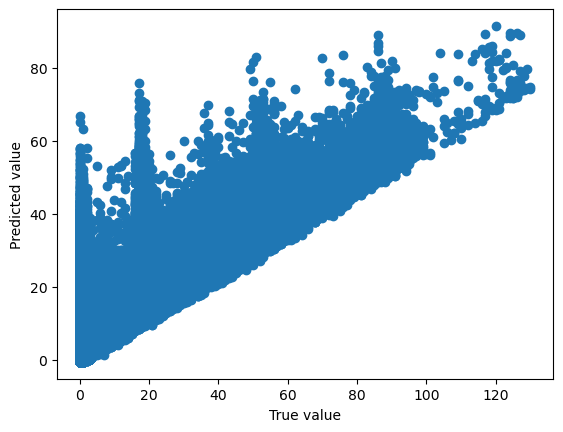

In [57]:
plt.scatter(y_test, pred_las) 
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [58]:
residuals_las = y_test - pred_las

In [59]:
residuals_las

Date_Time
2009-05-09 02:00:00    -1.279967
2009-05-02 10:16:00     4.998779
2010-01-10 11:43:00    -3.917913
2008-04-17 17:31:00    -1.307008
2007-05-14 21:29:00    12.437860
                         ...    
2006-12-26 07:26:00   -23.105020
2009-09-27 04:43:00     1.096297
2008-06-06 00:05:00    -1.325719
2007-06-16 00:50:00    -0.456694
2008-12-10 16:16:00    -2.597781
Name: Metering, Length: 622578, dtype: float64

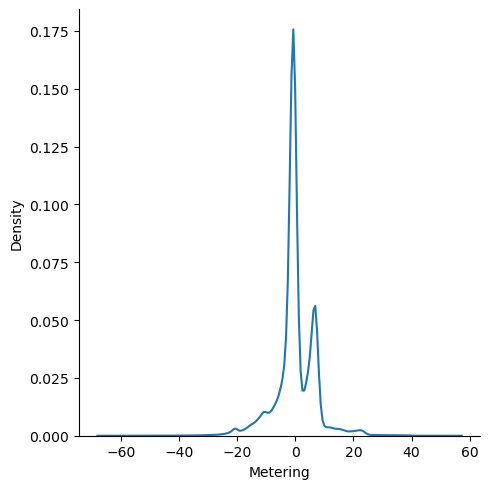

In [60]:
sns.displot(residuals_las, kind = 'kde')

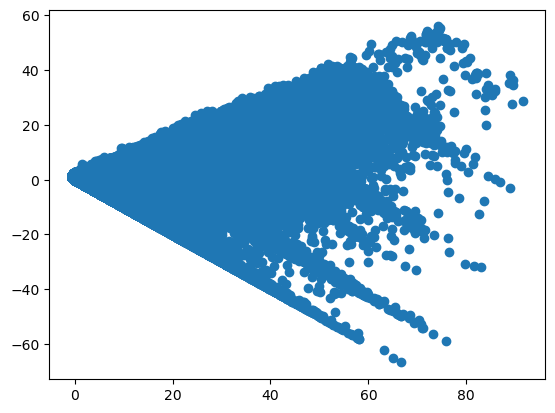

In [61]:
plt.scatter(pred_las, residuals_las)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, pred_las))
print(mean_absolute_error(y_test, pred_las))
print(np.sqrt(mean_squared_error(y_test, pred_las)))

47.14497516922841
4.424488029215093
6.866219860245404


#### R2 and adjusted R2

In [63]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_las)
print(score)

0.7109658052025092


In [64]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7109639481724432

### Elastic Net

In [65]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [66]:
elastic.fit(x_train, y_train)

ElasticNet()

In [67]:
elastic.coef_

array([ 4.10360942,  0.        , -0.41469539,  4.01905425])

In [68]:
elastic.intercept_

8.890079687729472

In [69]:
pred_elas = elastic.predict(x_test)

In [70]:
pred_elas

array([ 2.98623702, 12.33923864, 20.55534068, ...,  2.38669593,
        2.89887014, 17.91474617])

#### Assumption of linear regression

Text(0, 0.5, 'predicted data')

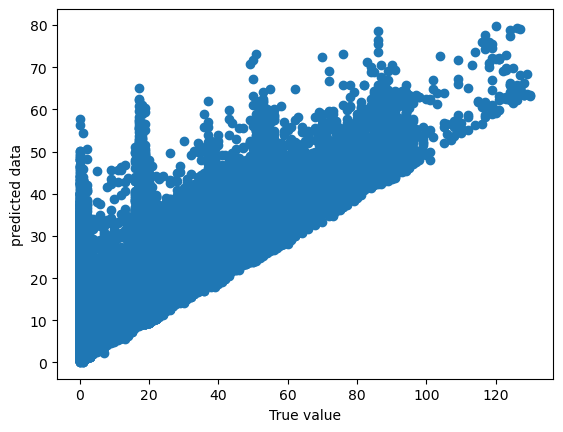

In [71]:
plt.scatter(y_test, pred_elas)
plt.xlabel('True value')
plt.ylabel('predicted data')

In [73]:
residuals_elas = y_test-pred_elas

In [74]:
residuals_elas

Date_Time
2009-05-09 02:00:00    -1.986237
2009-05-02 10:16:00     5.660761
2010-01-10 11:43:00    -1.555341
2008-04-17 17:31:00    -2.376549
2007-05-14 21:29:00    16.276916
                         ...    
2006-12-26 07:26:00   -20.553066
2009-09-27 04:43:00    -0.098400
2008-06-06 00:05:00    -2.386696
2007-06-16 00:50:00    -1.898870
2008-12-10 16:16:00     0.085254
Name: Metering, Length: 622578, dtype: float64

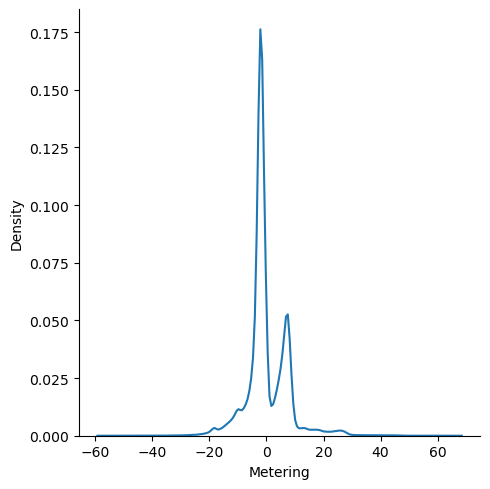

In [75]:
sns.displot(residuals_elas, kind = 'kde')

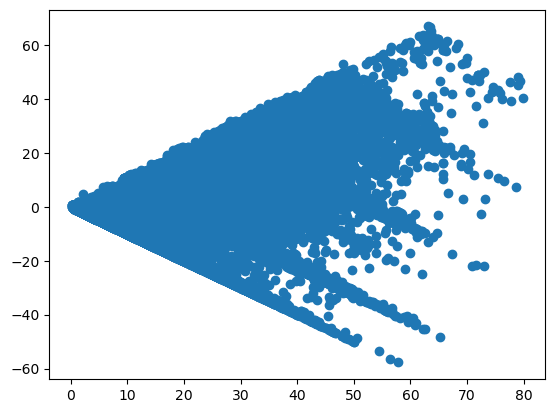

In [76]:
plt.scatter(pred_elas, residuals_elas)

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, pred_elas))
print(mean_absolute_error(y_test, pred_elas))
print(np.sqrt(mean_squared_error(y_test, pred_elas)))

52.99559589488555
5.030307088195823
7.279807407815508


#### R2 and Adjutsed R2

In [79]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred_elas)
score

0.675097095028502

In [80]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6750950075437896

## SVM Kernels Support Vector Regression

In [86]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Metering
Date_Time,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


In [87]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'data'
df.reset_index(drop=True, inplace=True)

In [88]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Metering
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,18.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,19.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,18.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,18.0


In [90]:
X_SVM = df.drop(columns = ['Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'])

In [91]:
Y_SVM = df['Metering']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_SVM, Y_SVM, test_size = 0.3)

In [97]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train, y_train)

# transforming the test data. we avoid fitting the values to prevent data leakage
x_test = scaler.transform(x_test)

In [98]:
x_train

array([[-0.71765734,  0.0921761 ,  0.66826099, -0.73122043, -0.61647365],
       [ 1.5923241 , -1.10439784, -0.18858756,  1.532014  ,  0.79141432],
       [ 0.62570913,  1.69951422, -2.24999133,  0.67198492, -0.61647365],
       ...,
       [-0.71956012, -0.30072878,  0.14359648, -0.73122043, -0.53825765],
       [-0.68150442,  0.78868928,  1.09047622, -0.64069105, -0.53825765],
       [ 1.23840602, -0.60433709,  0.93525003,  1.16989649,  0.71319832]])

In [100]:
y_train

1481106     1.0
1021852    19.0
18762       1.0
1886403     1.0
1008291    17.0
           ... 
89033       0.0
1937344     0.0
947931      2.0
678179      2.0
582573     18.0
Name: Metering, Length: 1452681, dtype: float64

In [101]:
Y_SVM

0          18.0
1          17.0
2          19.0
3          18.0
4          18.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Metering, Length: 2075259, dtype: float64

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuaracy_score(y_test, y_pred)

print(accuracy_score)

ValueError: Unknown label type: 'continuous'

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'poly')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuarcy_score(y_test, y_pred)

ValueError: Unknown label type: 'continuous'

In [85]:
Y

Date_Time
2006-12-16 17:24:00    18.0
2006-12-16 17:25:00    17.0
2006-12-16 17:26:00    19.0
2006-12-16 17:27:00    18.0
2006-12-16 17:28:00    18.0
                       ... 
2010-11-26 20:58:00     0.0
2010-11-26 20:59:00     0.0
2010-11-26 21:00:00     0.0
2010-11-26 21:01:00     0.0
2010-11-26 21:02:00     0.0
Name: Metering, Length: 2075259, dtype: float64

In [83]:
y_train

Date_Time
2009-02-17 07:24:00     1.0
2008-07-30 22:33:00    39.0
2008-06-20 23:41:00     1.0
2007-08-04 20:58:00     0.0
2006-12-19 13:49:00     0.0
                       ... 
2009-03-31 05:31:00     0.0
2007-12-10 05:40:00     0.0
2010-02-12 19:25:00     1.0
2007-05-11 01:56:00     1.0
2007-07-29 11:24:00     0.0
Name: Metering, Length: 1452681, dtype: float64

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

ValueError: Unknown label type: 'continuous'

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel='poly')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

ValueError: Unknown label type: 'continuous'

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier =  SVC(kernel = 'sigmoid')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

ValueError: Unknown label type: 'continuous'